# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



In [2]:
# Load dataset
file_path = "/content/final_internship_data.csv"
df = pd.read_csv(file_path)


# Preproccessing

In [3]:
# Drop rows with missing values
df = df.dropna()


In [4]:
# Remove invalid passenger counts (should be at least 1)
df = df[df['passenger_count'] >= 1]


In [5]:
# Remove negative fares and extreme outliers (e.g., max fare of 500)
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]


In [6]:
# Remove zero and extreme distances
df = df[(df['distance'] > 0) & (df['distance'] < 100)]


# Balancing

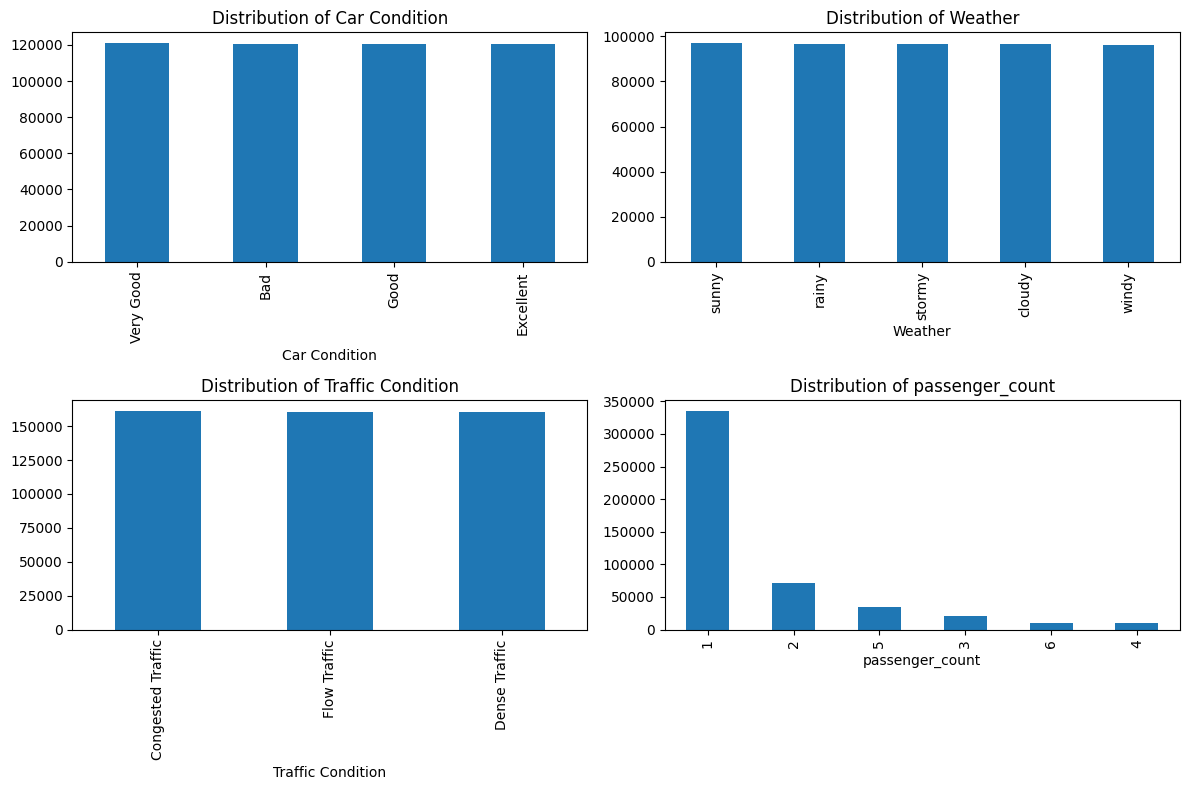

In [8]:
# Check data balance
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.flatten(), ['Car Condition', 'Weather', 'Traffic Condition', 'passenger_count']):
    df[col].value_counts().plot(kind='bar', ax=ax, title=f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [9]:
# Balance the dataset using undersampling of the dominant passenger class
min_count = df['passenger_count'].value_counts().min()
df = df.groupby('passenger_count').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


<ipython-input-9-c1456da504b4>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('passenger_count').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


#Scaling

In [21]:
# Scaling using Min-Max Scaler
scaler = MinMaxScaler()
df[['fare_amount', 'distance']] = scaler.fit_transform(df[['fare_amount', 'distance']])

# Display summary after scaling
scaled_summary = df.describe()
scaled_summary


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000
mean,0.099598,-1.289710,0.709923,-1.289694,0.709934,3.500000,13.702540,15.747932,6.305066,3.198226,2011.867487,62.634745,56.388802,40.465730,39.620316,31.893465,0.034391,0.313717
std,0.104693,0.051708,0.049783,0.051714,0.049778,1.707839,6.669774,8.696247,3.431193,1.961386,1.860897,767.135262,768.354090,768.609122,768.546553,768.804775,0.037892,1.832857
min,0.000000,-1.316913,-1.291796,-1.317101,-1.291818,1.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.162487,1.470599,0.624983,1.097468,0.437030,0.000000,-3.141498
25%,0.039452,-1.291412,0.710976,-1.291399,0.710960,2.000000,9.000000,8.000000,3.000000,2.000000,2010.000000,41.330492,32.063890,17.190160,14.718288,6.981454,0.012937,-0.881509
50%,0.065753,-1.291237,0.711273,-1.291213,0.711285,3.500000,15.000000,16.000000,6.000000,3.000000,2012.000000,42.505973,34.536577,19.614789,18.071829,10.209764,0.022119,-0.121119
75%,0.115068,-1.291008,0.711514,-1.290949,0.711537,5.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.674864,37.914075,22.097829,22.021210,14.067455,0.040412,2.266253
max,1.000000,0.712319,0.729552,0.712253,0.731709,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,1.000000,3.141593


# Exploratory Data Analysis (EDA)


In [17]:
# Summary statistics
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000
mean,0.099598,-1.289710,0.709923,-1.289694,0.709934,3.500000,13.702540,15.747932,6.305066,3.198226,2011.867487,62.634745,56.388802,40.465730,39.620316,31.893465,0.034391,0.313717
std,0.104693,0.051708,0.049783,0.051714,0.049778,1.707839,6.669774,8.696247,3.431193,1.961386,1.860897,767.135262,768.354090,768.609122,768.546553,768.804775,0.037892,1.832857
min,0.000000,-1.316913,-1.291796,-1.317101,-1.291818,1.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.162487,1.470599,0.624983,1.097468,0.437030,0.000000,-3.141498
25%,0.039452,-1.291412,0.710976,-1.291399,0.710960,2.000000,9.000000,8.000000,3.000000,2.000000,2010.000000,41.330492,32.063890,17.190160,14.718288,6.981454,0.012937,-0.881509
50%,0.065753,-1.291237,0.711273,-1.291213,0.711285,3.500000,15.000000,16.000000,6.000000,3.000000,2012.000000,42.505973,34.536577,19.614789,18.071829,10.209764,0.022119,-0.121119
75%,0.115068,-1.291008,0.711514,-1.290949,0.711537,5.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.674864,37.914075,22.097829,22.021210,14.067455,0.040412,2.266253
max,1.000000,0.712319,0.729552,0.712253,0.731709,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,1.000000,3.141593


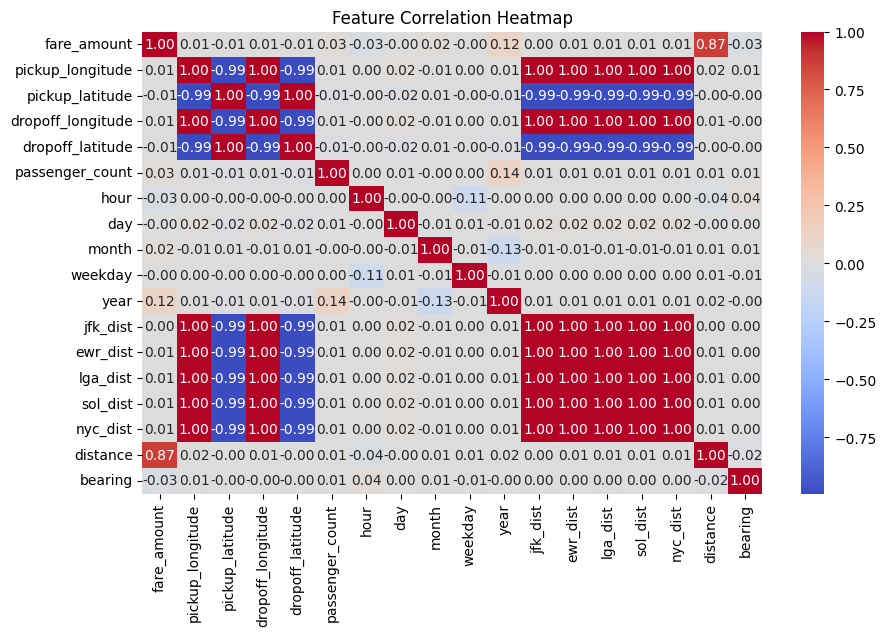

In [20]:
# Correlation heatmap (select only numerical columns)
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


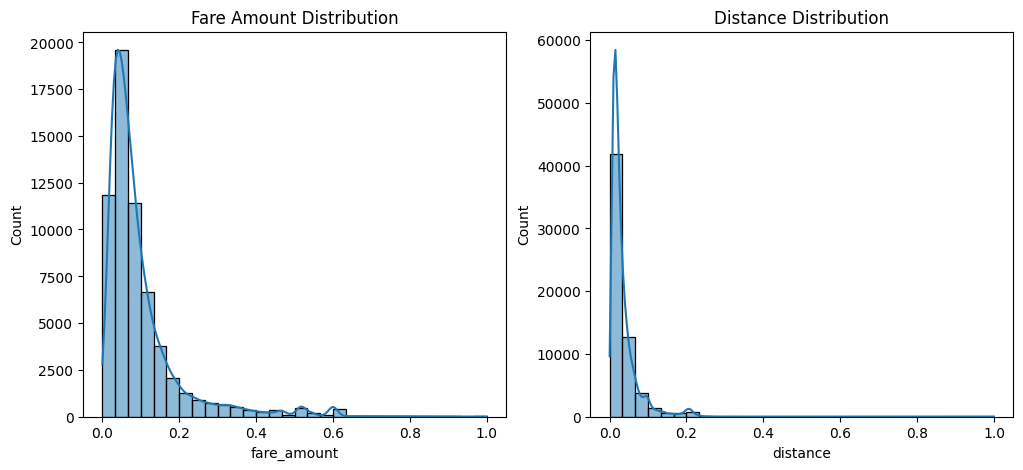

In [19]:
# Distribution of fare amount and distance
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['fare_amount'], bins=30, kde=True, ax=axes[0]).set(title='Fare Amount Distribution')
sns.histplot(df['distance'], bins=30, kde=True, ax=axes[1]).set(title='Distance Distribution')
plt.show()

In [10]:
# Scaling using Min-Max Scaler
scaler = MinMaxScaler()
df[['fare_amount', 'distance']] = scaler.fit_transform(df[['fare_amount', 'distance']])

In [11]:
# Display summary after scaling
scaled_summary = df.describe()
scaled_summary


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000,61662.000000
mean,0.099598,-1.289710,0.709923,-1.289694,0.709934,3.500000,13.702540,15.747932,6.305066,3.198226,2011.867487,62.634745,56.388802,40.465730,39.620316,31.893465,0.034391,0.313717
std,0.104693,0.051708,0.049783,0.051714,0.049778,1.707839,6.669774,8.696247,3.431193,1.961386,1.860897,767.135262,768.354090,768.609122,768.546553,768.804775,0.037892,1.832857
min,0.000000,-1.316913,-1.291796,-1.317101,-1.291818,1.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.162487,1.470599,0.624983,1.097468,0.437030,0.000000,-3.141498
25%,0.039452,-1.291412,0.710976,-1.291399,0.710960,2.000000,9.000000,8.000000,3.000000,2.000000,2010.000000,41.330492,32.063890,17.190160,14.718288,6.981454,0.012937,-0.881509
50%,0.065753,-1.291237,0.711273,-1.291213,0.711285,3.500000,15.000000,16.000000,6.000000,3.000000,2012.000000,42.505973,34.536577,19.614789,18.071829,10.209764,0.022119,-0.121119
75%,0.115068,-1.291008,0.711514,-1.290949,0.711537,5.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.674864,37.914075,22.097829,22.021210,14.067455,0.040412,2.266253
max,1.000000,0.712319,0.729552,0.712253,0.731709,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,1.000000,3.141593


<ipython-input-22-a3ee5750d6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['hour'], palette='viridis')


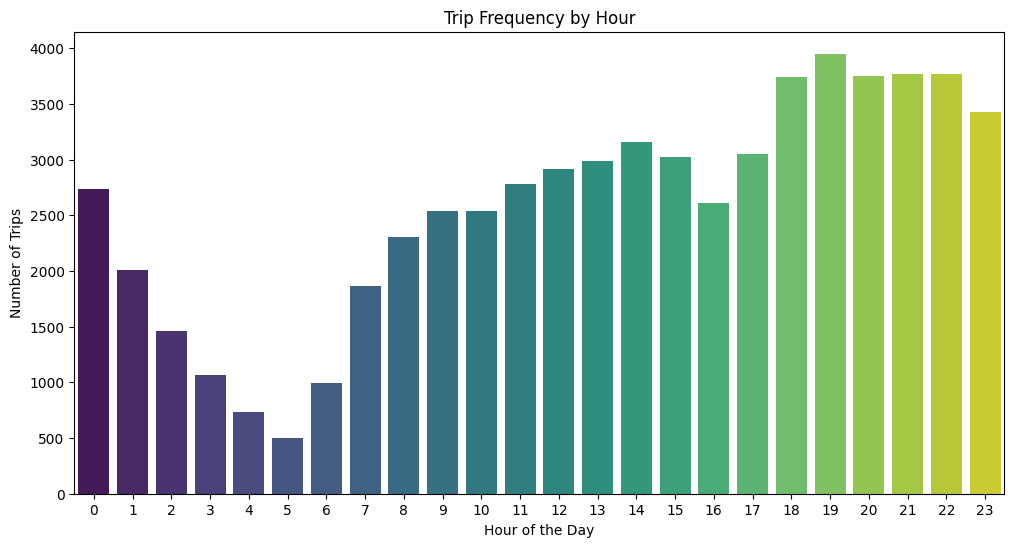

In [22]:
# Time-Based Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x=df['hour'], palette='viridis')
plt.title("Trip Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.show()




<ipython-input-23-cfa2a047f20e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['hour'], y=df['fare_amount'], palette='coolwarm')


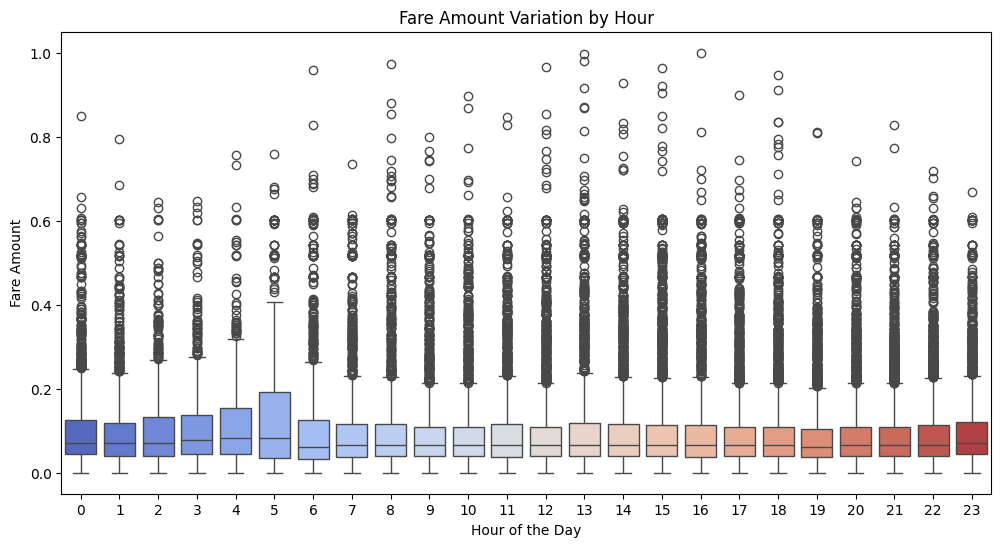

In [23]:
# Fare Variation by Time
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['hour'], y=df['fare_amount'], palette='coolwarm')
plt.title("Fare Amount Variation by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Fare Amount")
plt.show()



<ipython-input-24-e6ce6ab0b721>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Weather'], y=df['fare_amount'], palette='pastel')


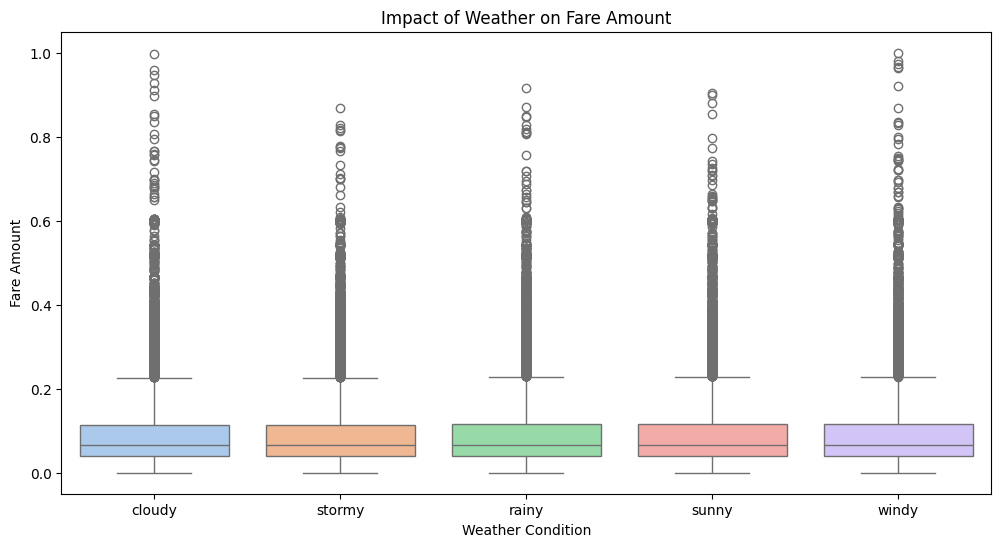

In [24]:
# Categorical Impact on Fare
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Weather'], y=df['fare_amount'], palette='pastel')
plt.title("Impact of Weather on Fare Amount")
plt.xlabel("Weather Condition")
plt.ylabel("Fare Amount")
plt.show()



<ipython-input-25-d264695179c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['passenger_count'], y=df['fare_amount'], palette='magma')


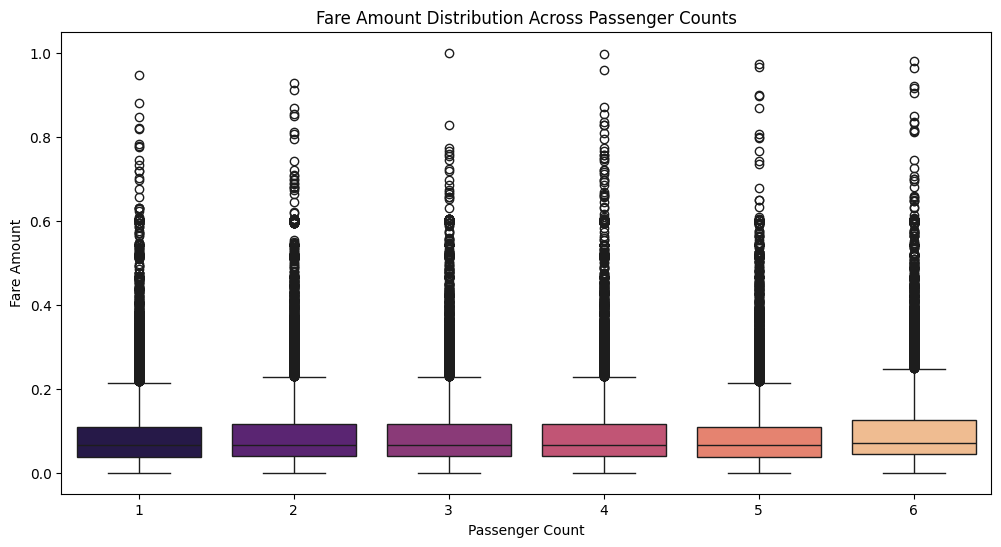

In [25]:
# Passenger Count Effect
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['passenger_count'], y=df['fare_amount'], palette='magma')
plt.title("Fare Amount Distribution Across Passenger Counts")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount")
plt.show()

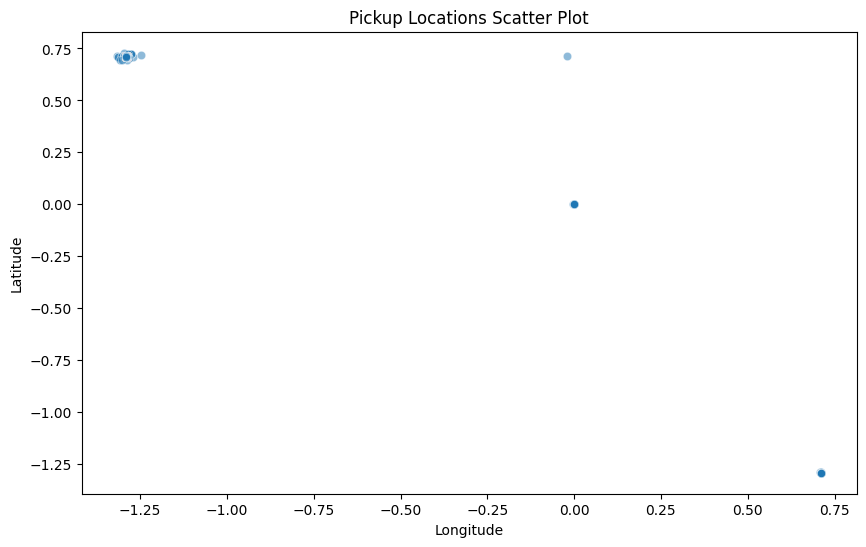

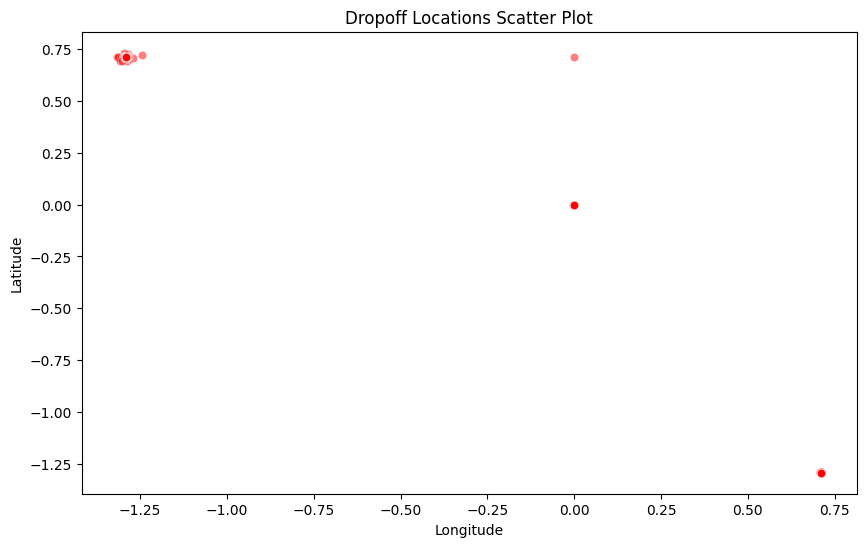

In [26]:
# Geospatial Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'], alpha=0.5)
plt.title("Pickup Locations Scatter Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['dropoff_longitude'], y=df['dropoff_latitude'], alpha=0.5, color='red')
plt.title("Dropoff Locations Scatter Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



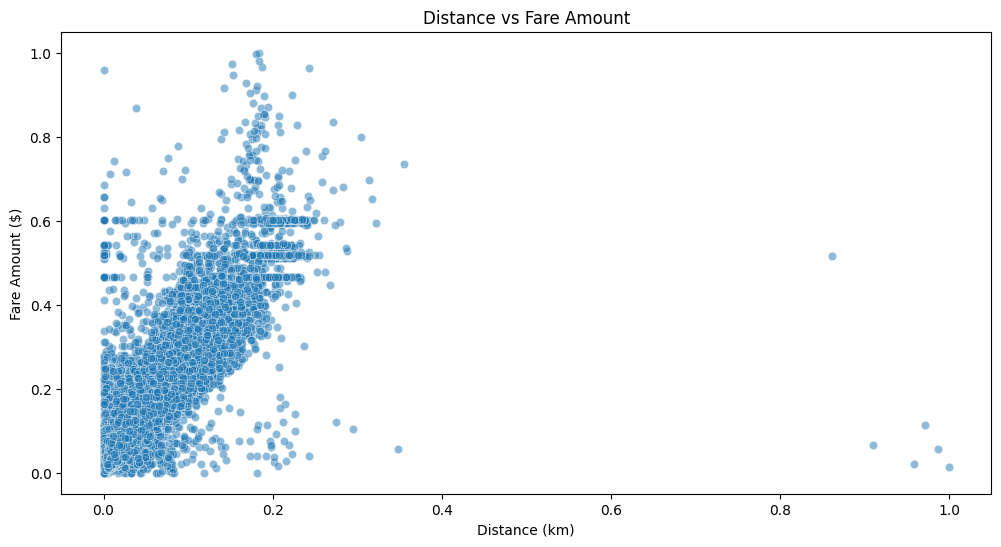

In [27]:
# Distance vs Fare Relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['distance'], y=df['fare_amount'], alpha=0.5)
plt.title("Distance vs Fare Amount")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.show()



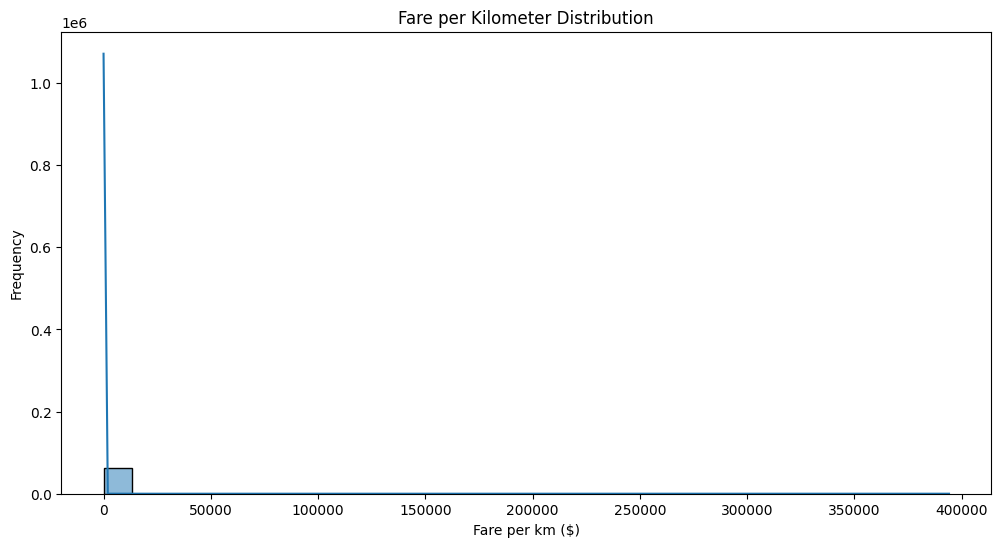

In [28]:
# Fare per km Analysis
plt.figure(figsize=(12, 6))
df['fare_per_km'] = df['fare_amount'] / df['distance']
sns.histplot(df['fare_per_km'], bins=30, kde=True)
plt.title("Fare per Kilometer Distribution")
plt.xlabel("Fare per km ($)")
plt.ylabel("Frequency")
plt.show()



<ipython-input-29-b6e851d9e569>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Traffic Condition'], y=df['fare_amount'], palette='Set2')


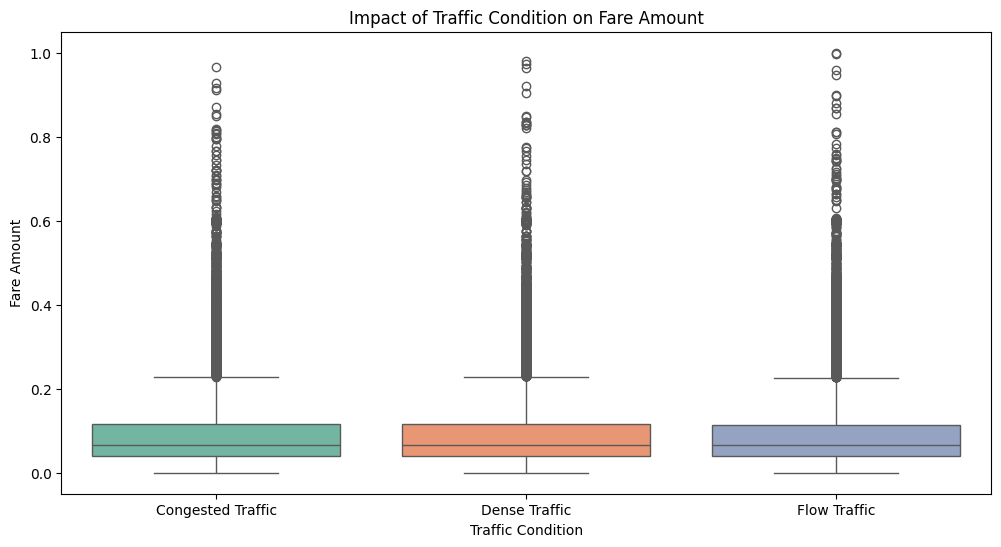

In [29]:
# Impact of Traffic Condition on Fare
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Traffic Condition'], y=df['fare_amount'], palette='Set2')
plt.title("Impact of Traffic Condition on Fare Amount")
plt.xlabel("Traffic Condition")
plt.ylabel("Fare Amount")
plt.show()